## Attempt to fit Bitcoin Prices from Coindesk's API to a Log Periodic Power Law Singularity explained here
https://arxiv.org/pdf/1803.05663.pdf
https://pypi.org/project/lppls/


In [1]:
import pandas as pd
import numpy as np
from lppls import lppls, data_loader, lppls_cmaes
import requests
import json
%matplotlib inline

In [56]:
start = "2011-06-01"
end = "2021-05-16"
CURRENCY = "BTC"
MAX_SEARCHES = 25

In [41]:
date_ranges = {"2012-05-25": "2012-08-18",
               "2013-01-03": "2013-04-11",
               "2013-10-07": "2013-11-23",
               "2015-06-08": "2017-12-18",
               "2017-03-31": "2017-12-18" 
              }

In [42]:
starts = ["2012-05-25", "2013-01-03", "2013-10-07", "2015-06-08", "2017-03-31", "2017-12-18"]
ends = ["2012-08-18", "2013-04-11", "2013-11-23", "2017-12-18", "2017-12-18", "2021-05-16"]

In [43]:
def graph_lppl_model(start, end, currency):
    response = requests.get(f"https://api.coindesk.com/v1/bpi/historical/close.json?start={start}&end={end}")
    json_data = response.json() if response and response.status_code == 200 else None

    df = pd.DataFrame.from_dict(json_data['bpi'].items())
    df.columns = ["Date", "Close"]
    
    time = np.linspace(0, len(df)-1, len(df))
    price = np.log(df['Close'].values)
    observations = np.array([time, price])
    
    lppls_model = lppls.LPPLS(observations=observations)
    tc, m, w, a, b, c, c1, c2 = lppls_model.fit(observations, MAX_SEARCHES, minimizer='Nelder-Mead')
    lppls_model.plot_fit()
    print(f"{currency} prices from {start} to {end} FIT TO LPPLS")
    df.plot(figsize=(14, 8), x="Date", y="Close")

In [44]:
def graph_lppl_cmaes_model(start, end, currency):
    response = requests.get(f"https://api.coindesk.com/v1/bpi/historical/close.json?start={start}&end={end}")
    json_data = response.json() if response and response.status_code == 200 else None

    df = pd.DataFrame.from_dict(json_data['bpi'].items())
    df.columns = ["Date", "Close"]
    
    time = np.linspace(0, len(df)-1, len(df))
    price = np.log(df['Close'].values)
    observations = np.array([time, price])
    
    lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
    tc, m, w, a, b, c, c1, c2 = lppls_model.fit(max_iteration=2500, pop_size=4)
    lppls_model.plot_fit()
    print(f"{currency} prices from {start} to {end} FIT TO LPPLS CMA-ES")

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=355397, Mon May 17 15:37:45 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 3.340512746344601e+02 1.0e+00 1.54e+00  1e-01  4e+02 0:00.1
    2    320 2.409872583629643e+02 1.9e+00 2.83e+00  3e-01  5e+02 0:00.2
    3    480 2.300695886480054e+02 3.5e+00 3.84e+00  3e-01  5e+02 0:00.3
   28   4480 2.188678618119532e+02 1.4e+01 1.42e+01  8e-06  9e-03 0:03.4
   42   6720 2.188678618056503e+02 1.6e+01 8.85e+00  9e-09  6e-06 0:05.4
BTC prices from 2011-06-01 to 2021-05-16 FIT TO LPPLS CMA-ES


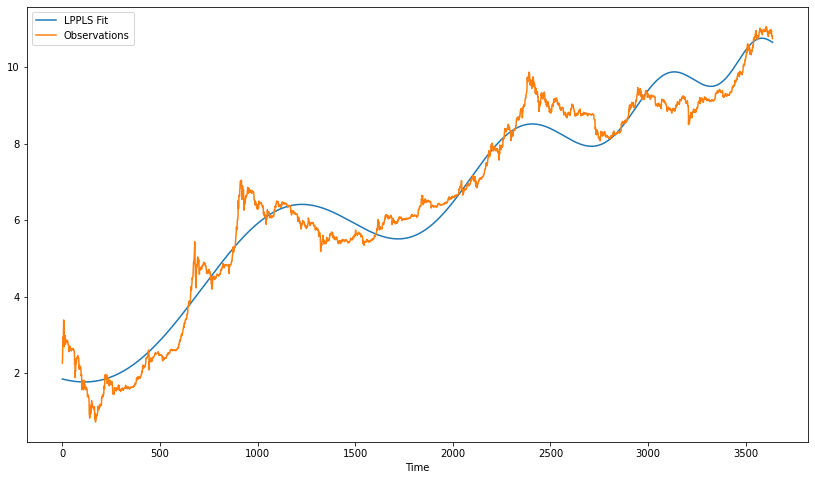

In [57]:
graph_lppl_cmaes_model(start, end, CURRENCY)

BTC prices from 2011-06-01 to 2021-05-16 FIT TO LPPLS


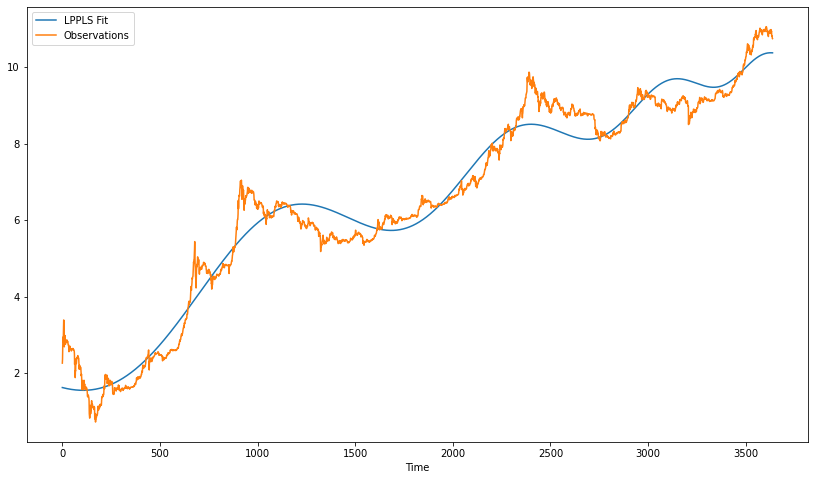

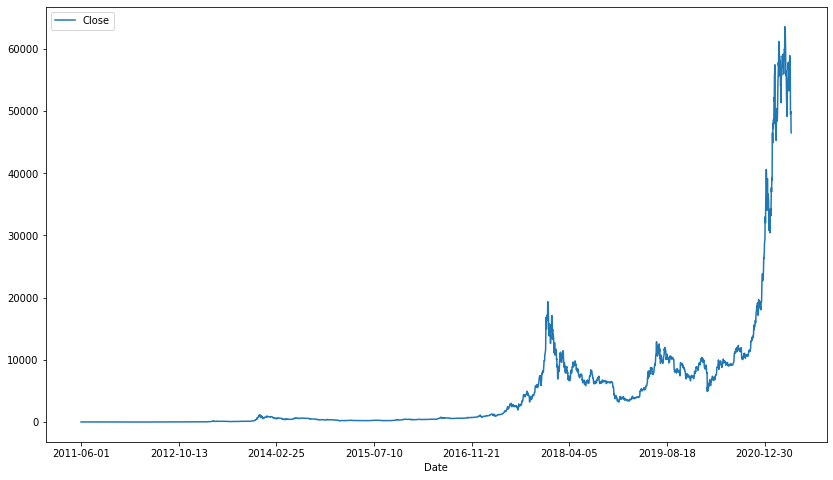

In [58]:
graph_lppl_model(start, end, CURRENCY)

BTC prices from 2012-05-25 to 2012-08-18 FIT TO LPPLS


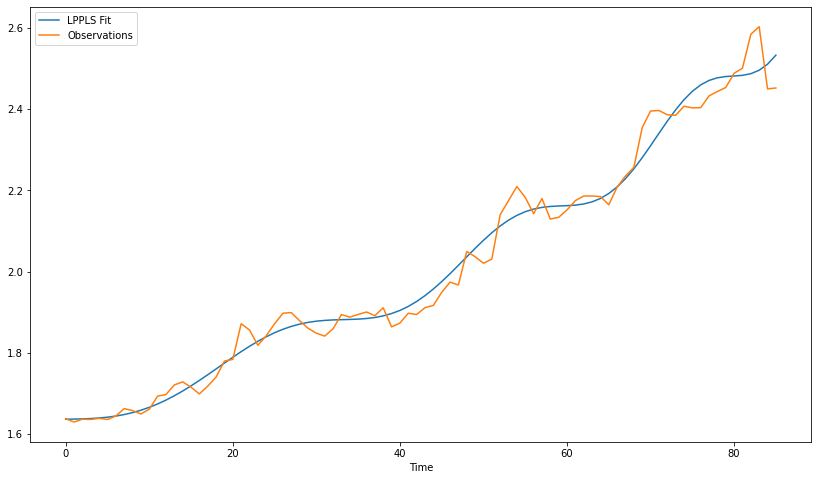

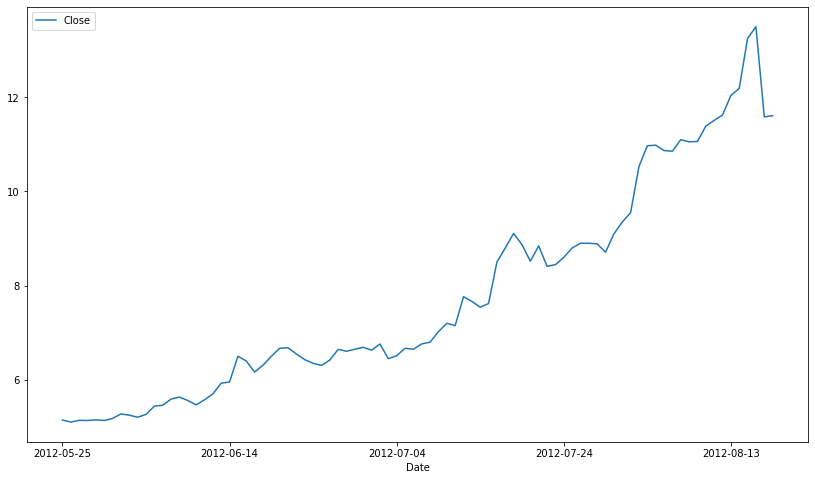

In [9]:
graph_lppl_model(starts[0], ends[0], CURRENCY)

BTC prices from 2013-01-03 to 2013-04-11 FIT TO LPPLS


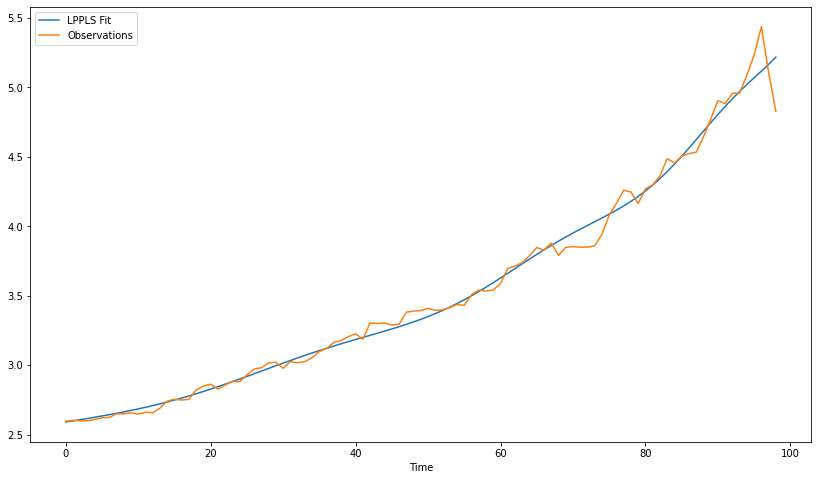

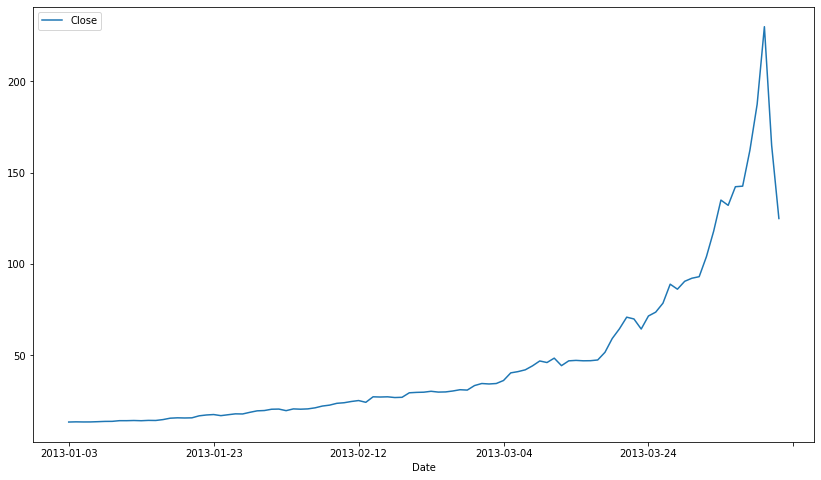

In [10]:
graph_lppl_model(starts[1], ends[1], CURRENCY)

BTC prices from 2013-10-07 to 2013-11-23 FIT TO LPPLS


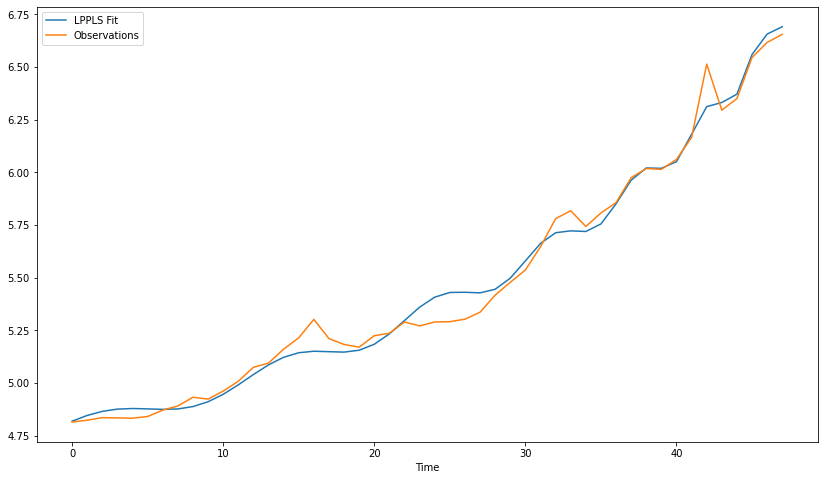

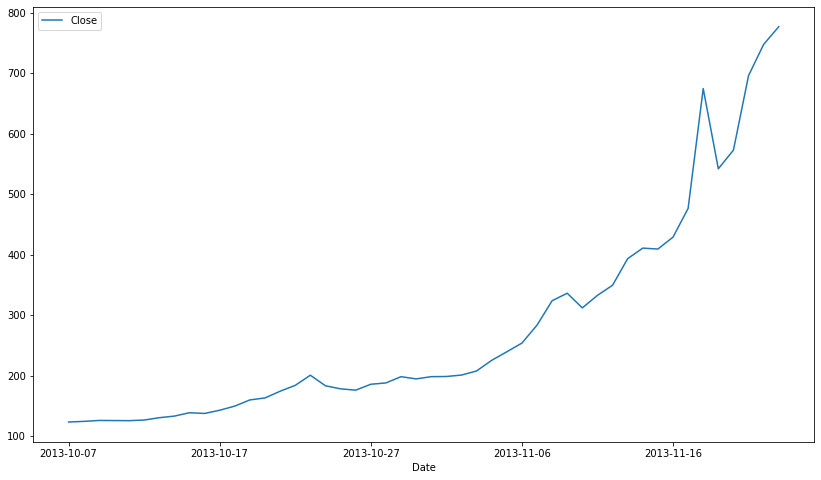

In [11]:
graph_lppl_model(starts[2], ends[2], CURRENCY)

BTC prices from 2015-06-08 to 2017-12-18 FIT TO LPPLS


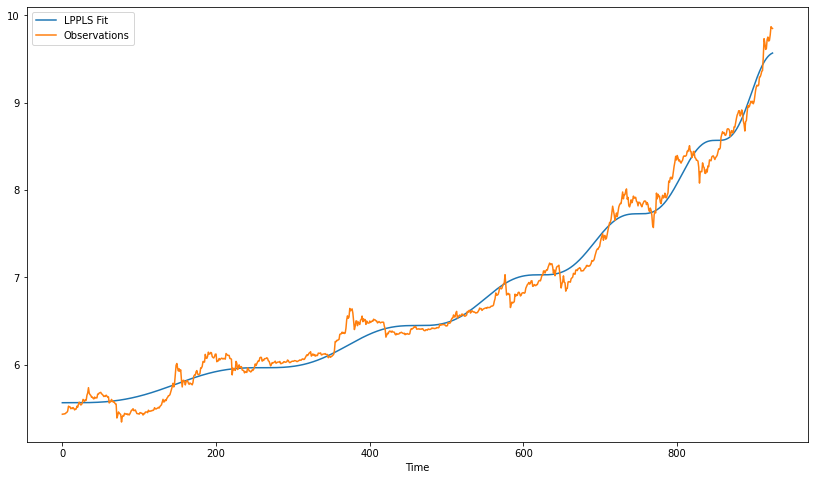

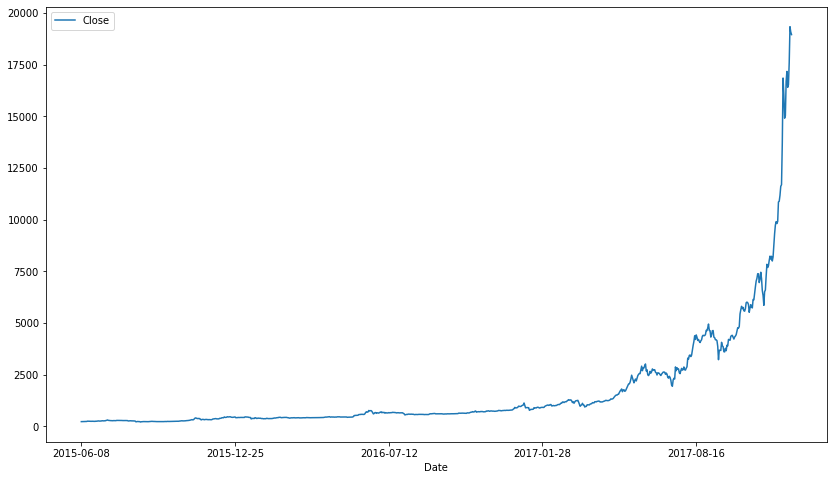

In [12]:
graph_lppl_model(starts[3], ends[3], CURRENCY)

BTC prices from 2017-03-31 to 2017-12-18 FIT TO LPPLS


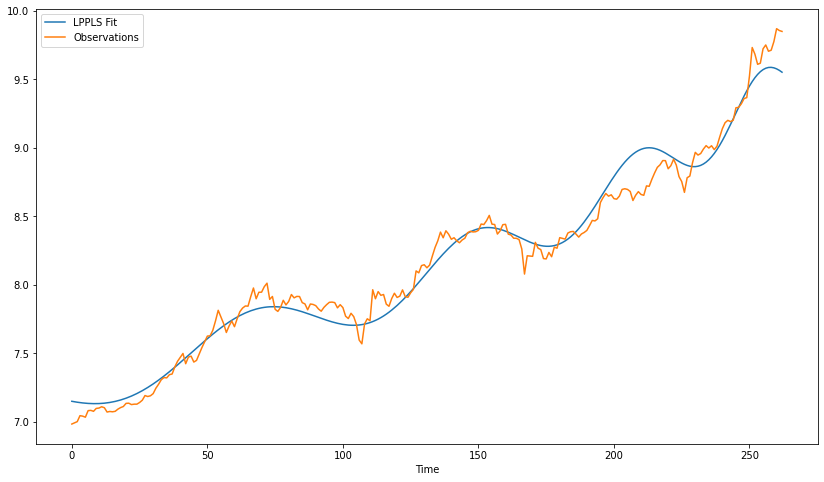

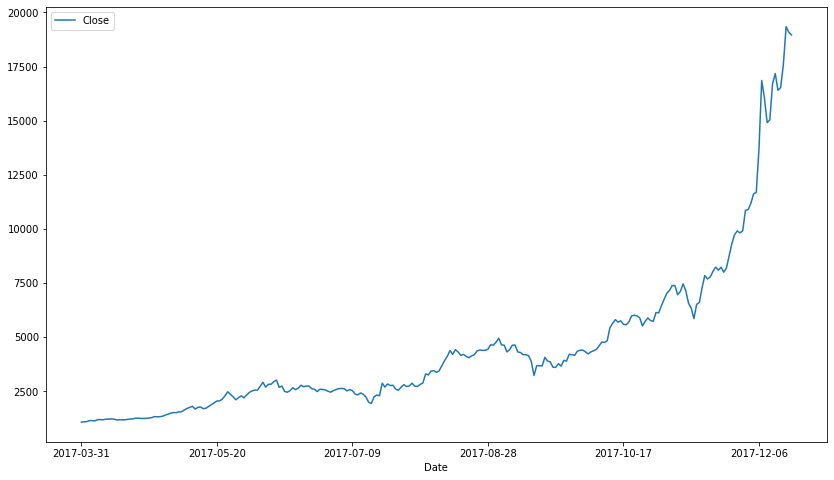

In [13]:
graph_lppl_model(starts[4], ends[4], CURRENCY)

BTC prices from 2017-12-18 to 2021-05-16 FIT TO LPPLS


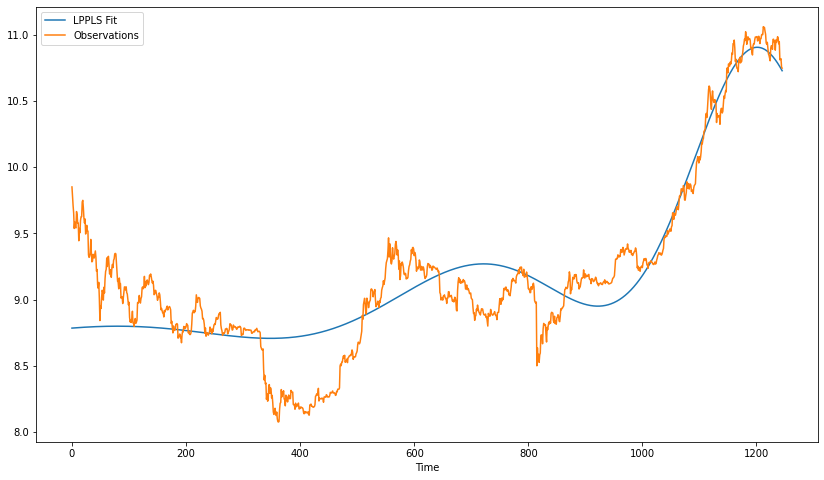

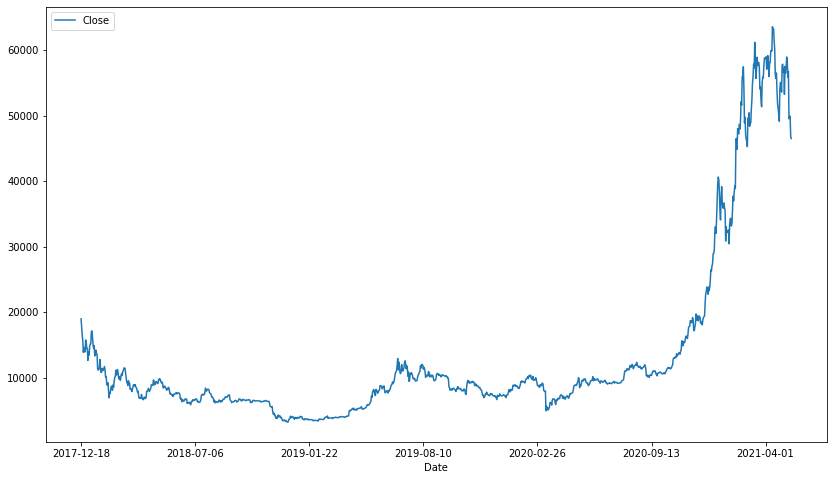

In [14]:
graph_lppl_model(starts[5], ends[5], CURRENCY)